In [1]:
# import basic packages
import scipy.io
import matplotlib.pyplot as plt
import numpy as np
import cv2, os, random

# No. 2 - 1

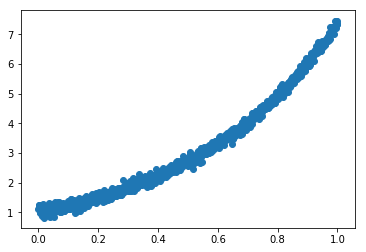

In [2]:
# 第二題之一 ： 將 mat 檔中的 x, y Plot 出來
# read mat files and plot 
mat = scipy.io.loadmat('data.mat')
x, y = mat['x'].reshape(-1), mat['y'].reshape(-1)

# find maximum and minimum value of x and y
max_x = np.max(x)
min_x = np.min(x)
max_y = np.max(y)
min_y = np.min(y)

# plot and show
plt.scatter(mat['x'], mat['y'])
plt.show()

# No. 2 - 2

In [3]:
# 第二題之二：算出 y = θ₀ + θ₁x
def linear_regression(x,y):
    x = np.concatenate((np.ones((x.shape[0],1)),x[:,np.newaxis]),axis=1)
    y = y[:,np.newaxis]
    beta = np.matmul(np.matmul(np.linalg.inv(np.matmul(x.T,x)),x.T),y)
    return beta

In [4]:
# 將x,y帶入
parameters_line =linear_regression(x,y)

Text(0, 0.5, 'y-asis')

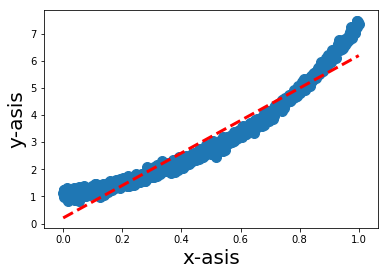

In [5]:
# 任意建立新的點
x_data = np.linspace(0,max_x,1000)
y_predict = parameters_line[0] + parameters_line[1]*x_data

# 將原本的資料與預測的 f(x) 畫出來
plt.scatter(x,y,s=100)
plt.plot(x_data,y_predict,'r--',linewidth = 3)
plt.xlabel('x-asis',fontsize=20)
plt.ylabel('y-asis',fontsize=20)

# No. 3

In [6]:
# 第三題：如上面，將一次線性式改為多項式（ second order polynomial  ）
# 第二題之二：算出 y = θ₀ + θ₁x + θ₂x²
def second_order_polynomial(x,y):
    x_tmp = np.concatenate((np.ones((x.shape[0],1)),x[:,np.newaxis]),axis=1)
    x = np.concatenate((x_tmp,x[:,np.newaxis]**2),axis=1)
    y = y[:,np.newaxis]
    
    print("X is : \n{}".format(x))
    print("Y is : \n{}".format(y))
    beta = np.matmul(np.matmul(np.linalg.inv(np.matmul(x.T,x)),x.T),y)
    return beta

In [7]:
parameters_polynomial = second_order_polynomial(x,y)

X is : 
[[1.00000e+00 0.00000e+00 0.00000e+00]
 [1.00000e+00 1.00000e-03 1.00000e-06]
 [1.00000e+00 2.00000e-03 4.00000e-06]
 ...
 [1.00000e+00 9.98000e-01 9.96004e-01]
 [1.00000e+00 9.99000e-01 9.98001e-01]
 [1.00000e+00 1.00000e+00 1.00000e+00]]
Y is : 
[[1.11889485]
 [1.24080293]
 [1.2305603 ]
 ...
 [7.44260211]
 [7.36491736]
 [7.34314766]]


Text(0, 0.5, 'y-asis')

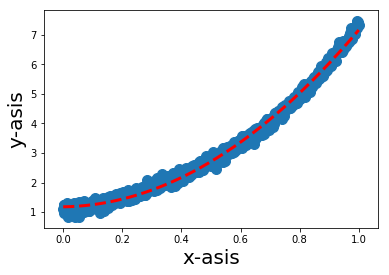

In [8]:
# 任意建立新的點
x_data = np.linspace(0,max_x,1000)
y_predict = parameters_polynomial[0] + parameters_polynomial[1]*x_data + parameters_polynomial[2]*x_data**2

# 將原本的資料與預測的 f(x) 畫出來
plt.scatter(x,y,s=100)
plt.plot(x_data,y_predict,'r--',linewidth = 3)
plt.xlabel('x-asis',fontsize=20)
plt.ylabel('y-asis',fontsize=20)

## 第二題及第三題作法說明及討論：[介紹](https://medium.com/@chih.sheng.huang821/%E7%B7%9A%E6%80%A7%E5%9B%9E%E6%AD%B8-linear-regression-3a271a7453e)

### 首先以下圖來說：<img src="images/lse.png" style="width: 500px;"/>

### 我們可以用兩個角度切入：

    - 線性代數角度
        - 以線性角度出發，我們將每個點（每筆資料）都設回一向量(vector)
        - 找到一個向量（線性方程或多項方程）使得各筆資料的投影（投影在該向量上）與其（各筆資料）距離越短越好
    - 垂直 (y,y*) 之間的距離最小，如圖之紅線
        - 但若資料為多維度，則不易用「 二維平面 」看出來
        - 顯而易見，我們希望找到一條線（線性或是多項式的線）來代表整體資料，亦即這條線與數筆資料的直線距離越短越好
        - First Step, we make（考慮兩個變數：θ₀、θ₁） :

<img src="images/sol-1.png" style="width: 300px;"/>
        
        - 接著利用微分概念得出：
            
<img src="images/sol-2.png" style="width: 300px;"/>
        
### 而這兩題我皆以 「 _線性代數角度_ 」，如講義所說：（如下兩圖）


| Linear One | Polynomial One |
| :---: | :---: |
| ![linear](images/linear.png) | ![poly](images/poly.png) |


### 大致推導步驟：

    1. 首先我們一樣衡量 loss function :

<img src="images/sol-3.png" style="width: 300px;"/>
    
    2. 接著，我們利用對 𝛽 微分，找出相對應係數：
    
<img src="images/sol-4.png" style="width: 300px;"/>

    3. 最後找到：
    
<img src="images/sol-5.png" style="width: 300px;"/>

    4. 而回到最初 y = θ₀ + θ₁x + θ₂x²，我們可以將 𝛽 和 X 帶入，以矩陣、向量寫的話，怎可以表達為：
    
<img src="images/sol-6.png" style="width: 300px;"/> 

# No. 4 - 1

In [9]:
# 第四題：處理 MNIST 資料集
from __future__ import print_function
import keras
from keras.datasets import mnist

# input image dimensions 28x28
img_rows, img_cols = 28, 28

# the data, split between train and test sets
(x_train, y_train), (x_test, y_test) = mnist.load_data()


x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255

Using TensorFlow backend.


In [10]:
# get some info of the data
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(60000, 28, 28)
(10000, 28, 28)
(60000,)
(10000,)


# No. 4 - 2

In [11]:
# save imagesfrom either the training or the testing dataset to form your own dataset, where each digit has 100 data samples
# save those digit images's file with the name using that exact number
# create data folder
data_root = "data"
data_train = "train"
data_test = "test"
train_sample = np.zeros((10,100,28,28))
train_sample_answer = np.zeros((10,100))
test_sample = np.zeros((10,100,28,28))
test_sample_answer = np.zeros((10,100))

if not os.path.exists(data_root):
    os.makedirs(data_root)
if not os.path.exists(os.path.join(data_root, data_train)):
    os.makedirs(os.path.join(data_root, data_train))
if not os.path.exists(os.path.join(data_root, data_test)):
    os.makedirs(os.path.join(data_root, data_test))
    
# renew the count_dict
count_dict = {
    "0" : 0,
    "1" : 0,
    "2" : 0,
    "3" : 0,
    "4" : 0,
    "5" : 0,
    "6" : 0,
    "7" : 0,
    "8" : 0,
    "9" : 0
}
    
print("Saving 100 samples images for each digit in testing data.... ")
    
# save for train images
for test_index in range(x_test.shape[0]) :
    if y_test[test_index] == 1 and count_dict["1"] < 99:
        if not os.path.exists(os.path.join(data_root, data_test,"1")):
            os.makedirs(os.path.join(data_root, data_test,"1"))
        x_test[test_index] = x_test[test_index]*255
        test_sample[0][count_dict["1"]] = x_test[test_index].astype(np.uint8)
        test_sample_answer[0][count_dict["1"]] = 1
        cv2.imwrite(os.path.join(data_root, data_test,"1/",str(count_dict["1"])+".jpg"), x_test[test_index].astype(np.uint8))
        count_dict["1"] += 1
    elif y_test[test_index] == 2 and count_dict["2"] < 99:
        if not os.path.exists(os.path.join(data_root, data_test,"2")):
            os.makedirs(os.path.join(data_root, data_test,"2"))
        x_test[test_index] = x_test[test_index]*255
        test_sample[1][count_dict["2"]] = x_test[test_index].astype(np.uint8)
        test_sample_answer[1][count_dict["2"]] = 2
        cv2.imwrite(os.path.join(data_root, data_test,"2/",str(count_dict["2"])+".jpg"), x_test[test_index].astype(np.uint8))
        count_dict["2"] += 1
    elif y_test[test_index] == 3 and count_dict["3"] < 99:
        if not os.path.exists(os.path.join(data_root, data_test,"3")):
            os.makedirs(os.path.join(data_root, data_test,"3"))
        x_test[test_index] = x_test[test_index]*255
        test_sample[2][count_dict["3"]] = x_test[test_index].astype(np.uint8)
        test_sample_answer[2][count_dict["3"]] = 3
        cv2.imwrite(os.path.join(data_root, data_test,"3/",str(count_dict["3"])+".jpg"), x_test[test_index].astype(np.uint8))
        count_dict["3"] += 1
    elif y_test[test_index] == 4 and count_dict["4"] < 99:
        if not os.path.exists(os.path.join(data_root, data_test,"4")):
            os.makedirs(os.path.join(data_root, data_test,"4"))
        x_test[test_index] = x_test[test_index]*255
        test_sample[3][count_dict["4"]] = x_test[test_index].astype(np.uint8)
        test_sample_answer[3][count_dict["4"]] = 4
        cv2.imwrite(os.path.join(data_root, data_test,"4/",str(count_dict["4"])+".jpg"), x_test[test_index].astype(np.uint8))
        count_dict["4"] += 1
    elif y_test[test_index] == 5 and count_dict["5"] < 99:
        if not os.path.exists(os.path.join(data_root, data_test,"5")):
            os.makedirs(os.path.join(data_root, data_test,"5"))
        x_test[test_index] = x_test[test_index]*255
        test_sample[4][count_dict["5"]] = x_test[test_index].astype(np.uint8)
        test_sample_answer[4][count_dict["5"]] = 5
        cv2.imwrite(os.path.join(data_root, data_test,"5/",str(count_dict["5"])+".jpg"), x_test[test_index].astype(np.uint8))
        count_dict["5"] += 1
    elif y_test[test_index] == 6 and count_dict["6"] < 99:
        if not os.path.exists(os.path.join(data_root, data_test,"6")):
            os.makedirs(os.path.join(data_root, data_test,"6"))
        x_test[test_index] = x_test[test_index]*255
        test_sample[5][count_dict["6"]] = x_test[test_index].astype(np.uint8)
        test_sample_answer[5][count_dict["6"]] = 6
        cv2.imwrite(os.path.join(data_root, data_test,"6/",str(count_dict["6"])+".jpg"), x_test[test_index].astype(np.uint8))
        count_dict["6"] += 1
    elif y_test[test_index] == 7 and count_dict["7"] < 99:
        if not os.path.exists(os.path.join(data_root, data_test,"7")):
            os.makedirs(os.path.join(data_root, data_test,"7"))
        x_test[test_index] = x_test[test_index]*255
        test_sample[6][count_dict["7"]] = x_test[test_index].astype(np.uint8)
        test_sample_answer[6][count_dict["7"]] = 7
        cv2.imwrite(os.path.join(data_root, data_test,"7/",str(count_dict["7"])+".jpg"), x_test[test_index].astype(np.uint8))   
        count_dict["7"] += 1
    elif y_test[test_index] == 8 and count_dict["8"] < 99:
        if not os.path.exists(os.path.join(data_root, data_test,"8")):
            os.makedirs(os.path.join(data_root, data_test,"8"))
        x_test[test_index] = x_test[test_index]*255
        test_sample[7][count_dict["8"]] = x_test[test_index].astype(np.uint8)
        test_sample_answer[7][count_dict["8"]] = 8
        cv2.imwrite(os.path.join(data_root, data_test,"8/",str(count_dict["8"])+".jpg"), x_test[test_index].astype(np.uint8)) 
        count_dict["8"] += 1
    elif y_test[test_index] == 9 and count_dict["9"] < 99:
        if not os.path.exists(os.path.join(data_root, data_test,"9")):
            os.makedirs(os.path.join(data_root, data_test,"9"))
        x_test[test_index] = x_test[test_index]*255
        test_sample[8][count_dict["9"]] = x_test[test_index].astype(np.uint8)
        test_sample_answer[8][count_dict["9"]] = 9
        cv2.imwrite(os.path.join(data_root, data_test,"9/",str(count_dict["9"])+".jpg"), x_test[test_index].astype(np.uint8))
        count_dict["9"] += 1
    elif y_test[test_index] == 0 and count_dict["0"] < 99:
        if not os.path.exists(os.path.join(data_root, data_test,"0")):
            os.makedirs(os.path.join(data_root, data_test,"0"))
        x_test[test_index] = x_test[test_index]*255
        test_sample[9][count_dict["0"]] = x_test[test_index].astype(np.uint8)
        test_sample_answer[9][count_dict["0"]] = 0
        cv2.imwrite(os.path.join(data_root, data_test,"0/",str(count_dict["0"])+".jpg"), x_test[test_index].astype(np.uint8))
        count_dict["0"] += 1
    else :
        pass
    
# ===========================================================================================
    
count_dict = {
    "0" : 0,
    "1" : 0,
    "2" : 0,
    "3" : 0,
    "4" : 0,
    "5" : 0,
    "6" : 0,
    "7" : 0,
    "8" : 0,
    "9" : 0
}
    
print("Saving 100 samples images for each digit in training data.... ")
    
# save for train images
for train_index in range(x_train.shape[0]) :
    
    if y_train[train_index] == 1 and count_dict["1"] < 99:
        if not os.path.exists(os.path.join(data_root, data_train,"1")):
            os.makedirs(os.path.join(data_root, data_train,"1"))
        x_train[train_index] = x_train[train_index]*255
        train_sample[0][count_dict["1"]] = x_train[train_index].astype(np.uint8)
        train_sample_answer[0][count_dict["1"]] = 1
        cv2.imwrite(os.path.join(data_root, data_train,"1/",str(count_dict["1"])+".jpg"), x_train[train_index].astype(np.uint8))
        count_dict["1"] += 1
    elif y_train[train_index] == 2 and count_dict["2"] < 99:
        if not os.path.exists(os.path.join(data_root, data_train,"2")):
            os.makedirs(os.path.join(data_root, data_train,"2"))
        x_train[train_index] = x_train[train_index]*255
        train_sample[1][count_dict["2"]] = x_train[train_index].astype(np.uint8)
        train_sample_answer[1][count_dict["2"]] = 2
        cv2.imwrite(os.path.join(data_root, data_train,"2/",str(count_dict["2"])+".jpg"), x_train[train_index].astype(np.uint8))
        count_dict["2"] += 1
    elif y_train[train_index] == 3 and count_dict["3"] < 99:
        if not os.path.exists(os.path.join(data_root, data_train,"3")):
            os.makedirs(os.path.join(data_root, data_train,"3"))
        x_train[train_index] = x_train[train_index]*255
        train_sample[2][count_dict["3"]] = x_train[train_index].astype(np.uint8)
        train_sample_answer[2][count_dict["3"]] = 3
        cv2.imwrite(os.path.join(data_root, data_train,"3/",str(count_dict["3"])+".jpg"), x_train[train_index].astype(np.uint8))
        count_dict["3"] += 1
    elif y_train[train_index] == 4 and count_dict["4"] < 99:
        if not os.path.exists(os.path.join(data_root, data_train,"4")):
            os.makedirs(os.path.join(data_root, data_train,"4"))
        x_train[train_index] = x_train[train_index]*255
        train_sample[3][count_dict["4"]] = x_train[train_index].astype(np.uint8)
        train_sample_answer[3][count_dict["4"]] = 4
        cv2.imwrite(os.path.join(data_root, data_train,"4/",str(count_dict["4"])+".jpg"), x_train[train_index].astype(np.uint8))
        count_dict["4"] += 1
    elif y_train[train_index] == 5 and count_dict["5"] < 99:
        if not os.path.exists(os.path.join(data_root, data_train,"5")):
            os.makedirs(os.path.join(data_root, data_train,"5"))
        x_train[train_index] = x_train[train_index]*255
        train_sample[4][count_dict["5"]] = x_train[train_index].astype(np.uint8)
        train_sample_answer[4][count_dict["5"]] = 5
        cv2.imwrite(os.path.join(data_root, data_train,"5/",str(count_dict["5"])+".jpg"), x_train[train_index].astype(np.uint8))
        count_dict["5"] += 1
    elif y_train[train_index] == 6 and count_dict["6"] < 99:
        if not os.path.exists(os.path.join(data_root, data_train,"6")):
            os.makedirs(os.path.join(data_root, data_train,"6"))
        x_train[train_index] = x_train[train_index]*255
        train_sample[5][count_dict["6"]] = x_train[train_index].astype(np.uint8)
        train_sample_answer[5][count_dict["6"]] = 6
        cv2.imwrite(os.path.join(data_root, data_train,"6/",str(count_dict["6"])+".jpg"), x_train[train_index].astype(np.uint8))
        count_dict["6"] += 1
    elif y_train[train_index] == 7 and count_dict["7"] < 99:
        if not os.path.exists(os.path.join(data_root, data_train,"7")):
            os.makedirs(os.path.join(data_root, data_train,"7"))
        x_train[train_index] = x_train[train_index]*255
        train_sample[6][count_dict["7"]] = x_train[train_index].astype(np.uint8)
        train_sample_answer[6][count_dict["7"]] = 7
        cv2.imwrite(os.path.join(data_root, data_train,"7/",str(count_dict["7"])+".jpg"), x_train[train_index].astype(np.uint8))   
        count_dict["7"] += 1
    elif y_train[train_index] == 8 and count_dict["8"] < 99:
        if not os.path.exists(os.path.join(data_root, data_train,"8")):
            os.makedirs(os.path.join(data_root, data_train,"8"))
        x_train[train_index] = x_train[train_index]*255
        train_sample[7][count_dict["8"]] = x_train[train_index].astype(np.uint8)
        train_sample_answer[7][count_dict["8"]] = 8
        cv2.imwrite(os.path.join(data_root, data_train,"8/",str(count_dict["8"])+".jpg"), x_train[train_index].astype(np.uint8)) 
        count_dict["8"] += 1
    elif y_train[train_index] == 9 and count_dict["9"] < 99:
        if not os.path.exists(os.path.join(data_root, data_train,"9")):
            os.makedirs(os.path.join(data_root, data_train,"9"))
        x_train[train_index] = x_train[train_index]*255
        train_sample[8][count_dict["9"]] = x_train[train_index].astype(np.uint8)
        train_sample_answer[8][count_dict["9"]] = 9
        cv2.imwrite(os.path.join(data_root, data_train,"9/",str(count_dict["9"])+".jpg"), x_train[train_index].astype(np.uint8))
        count_dict["9"] += 1
    elif y_train[train_index] == 0 and count_dict["0"] < 99:
        if not os.path.exists(os.path.join(data_root, data_train,"0")):
            os.makedirs(os.path.join(data_root, data_train,"0"))
        x_train[train_index] = x_train[train_index]*255
        train_sample[9][count_dict["0"]] = x_train[train_index].astype(np.uint8)
        train_sample_answer[9][count_dict["0"]] = 0
        cv2.imwrite(os.path.join(data_root, data_train,"0/",str(count_dict["0"])+".jpg"), x_train[train_index].astype(np.uint8))
        count_dict["0"] += 1
    else :
        pass

print("Finished !!!!!!!!")
# 上面是慢慢刻出來的，也可以直接用 numpy 的方法及特性，用 a [條件式] 來完成

Saving 100 samples images for each digit in testing data.... 
Saving 100 samples images for each digit in training data.... 
Finished !!!!!!!!


# No. 4 - 3

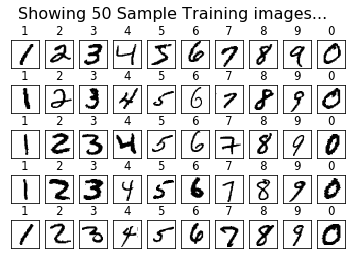

In [12]:
# show training sample images
amount= 50
lines = 5
columns = 10
sample_train_data = np.zeros((50,28,28))
fig = plt.figure()
fig.suptitle('Showing 50 Sample Training images...', fontsize=16)

for i in range(amount):
    
    current_number_index = i%columns
    current_number_image = i//columns
    sample_train_data[i] = train_sample[current_number_index,current_number_image]
    ax = fig.add_subplot(lines, columns, 1 + i)
    ax.set_title(int(train_sample_answer[current_number_index,current_number_image]))
    ax.imshow(train_sample[current_number_index,current_number_image], cmap='binary')
    ax.set_xticks([], [])
    ax.set_yticks([], [])

plt.show()

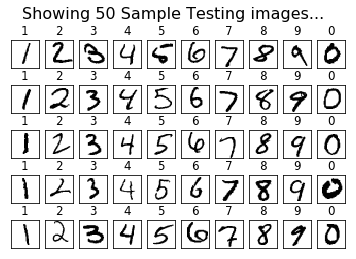

In [13]:
# show training sample images
amount= 50
lines = 5
columns = 10
fig = plt.figure()
sample_test_data = np.zeros((50,28,28))
fig.suptitle('Showing 50 Sample Testing images...', fontsize=16)

for i in range(amount):
    
    current_number_index = i%columns
    current_number_image = i//columns
    ax = fig.add_subplot(lines, columns, 1 + i)
    sample_test_data[i] = test_sample[current_number_index,current_number_image]
    ax.set_title(int(test_sample_answer[current_number_index,current_number_image]))
    ax.imshow(test_sample[current_number_index,current_number_image], cmap='binary')
    ax.set_xticks([], [])
    ax.set_yticks([], [])

plt.show()

In [14]:
# # 第四題之三 ： Normailze the training image, we then choice on images
train_sample = train_sample/255

print("We now normalize the Training Images ...\n")
train_sample = train_sample.reshape(1000,784)
normalize_mean = np.nanmean(train_sample, axis = 0)
normalize_std = np.nanstd(train_sample, axis = 0)

# handle zero std
normalize_std[normalize_std==0] = 1

print("mean is : {}, and standard variance is {} !".format(normalize_mean, normalize_std))

print("Then we normalize the training sample dataset ...")
train_sample_normalize = ((train_sample - normalize_mean) / (normalize_std))
print("Normalized Data is :\n{}".format((train_sample_normalize)))

We now normalize the Training Images ...

mean is : [0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 7.84313725e-05 4.86274510e-04
 0.00000000e+00 3.56862745e-04 1.34901961e-03 2.03529412e-03
 2.04705882e-03 1.25098039e-03 5.45098039e-04 7.41176471e-04
 8.54901961e-04 5.09803922e-05 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.

# No. 4 - 3

In [15]:
print("Then we can also compute the Covariance Matrix ...")
train_cov = np.matmul(train_sample_normalize.T, train_sample_normalize)
print("Covariance of the sample data is : \n{}".format(train_cov))

Then we can also compute the Covariance Matrix ...
Covariance of the sample data is : 
[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


# No. 4 - 4

In [16]:
#  第四題之四 ：  Compute eigenpairs for the covariance
# reshape train sample
train_sample = train_sample.reshape(10,100,784)

# eigenvectors and eigenvalues for the from the covariance matrix
eig_val_cov, eig_vec_cov = np.linalg.eig(train_cov)

# Make a list of (eigenvalue, eigenvector) tuples
eig_pairs = [(np.abs(eig_val_cov[i]), eig_vec_cov[:,i]) for i in range(len(eig_val_cov))]

# Sort the (eigenvalue, eigenvector) tuples from high to low
eig_pairs.sort(key=lambda x: x[0], reverse=True)

eig_pairs_500 = eig_pairs[:500]
eig_pairs_300 = eig_pairs[:300]
eig_pairs_100 = eig_pairs[:100]
eig_pairs_50 = eig_pairs[:50]
eig_pairs_10 = eig_pairs[:10]
eig_pairs_2 = eig_pairs[:2]
eig_pairs_biggest = eig_pairs[:1]

# No. 4 - 5

The New Data is : 
[[ 0.02086029  0.0060809   0.01243795 ...  0.0584147  -0.04757836
   0.        ]
 [ 0.          0.          0.         ...  0.          0.
   0.        ]
 [ 0.          0.          0.         ...  0.          0.
   0.        ]
 ...
 [ 0.          0.          0.         ...  0.          0.
   0.        ]
 [ 0.          0.          0.         ...  0.          0.
   0.        ]
 [ 0.          0.          0.         ...  0.          0.
   0.        ]]


/Users/wangboren/.pyenv/versions/3.6.4/lib/python3.6/site-packages/ipykernel_launcher.py:14: ComplexWarning: Casting complex values to real discards the imaginary part
  


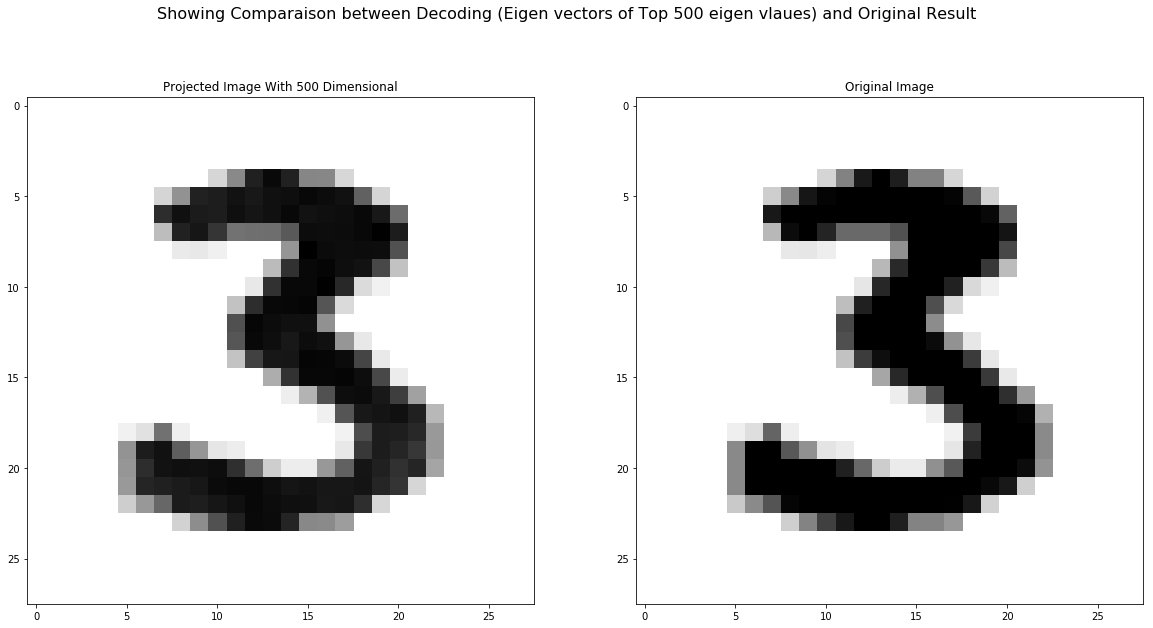

In [17]:
# plot 前 500 大的 eigen vectors 所畫出來的圖
# first we random choice the digit
# then radom choice image
random_digit = random.choice(train_sample)
random_image = random.choice(random_digit)
vectors = np.zeros((500,784))

projected_result = np.zeros((784))

count = 0
for each_value, each_vector in eig_pairs_500 :
    tmp = np.abs(random_image.reshape(-1).T * each_vector)
    projected_result += (tmp - np.mean(tmp))/ np.std(tmp)
    vectors[count] = each_vector
    count += 0

print("The New Data is : \n{}".format(np.matmul(vectors , train_sample.reshape(1000,784).T)))

fig = plt.figure(figsize=(20,10))
fig.suptitle('Showing Comparaison between Decoding (Eigen vectors of Top 500 eigen vlaues) and Original Result', fontsize=16)

ax = fig.add_subplot(1, 2, 1)
ax.set_title("Projected Image With 500 Dimensional")
ax.imshow(projected_result.reshape(28,28), cmap='binary')
ax1 = fig.add_subplot(1, 2, 2)
ax1.set_title("Original Image")
ax1.imshow(random_image.reshape(28,28), cmap='binary')

The New Data is : 
[[-0.048741   -0.08137146  0.05134475 ... -0.12016946 -0.03222935
   0.        ]
 [ 0.          0.          0.         ...  0.          0.
   0.        ]
 [ 0.          0.          0.         ...  0.          0.
   0.        ]
 ...
 [ 0.          0.          0.         ...  0.          0.
   0.        ]
 [ 0.          0.          0.         ...  0.          0.
   0.        ]
 [ 0.          0.          0.         ...  0.          0.
   0.        ]]


/Users/wangboren/.pyenv/versions/3.6.4/lib/python3.6/site-packages/ipykernel_launcher.py:14: ComplexWarning: Casting complex values to real discards the imaginary part
  


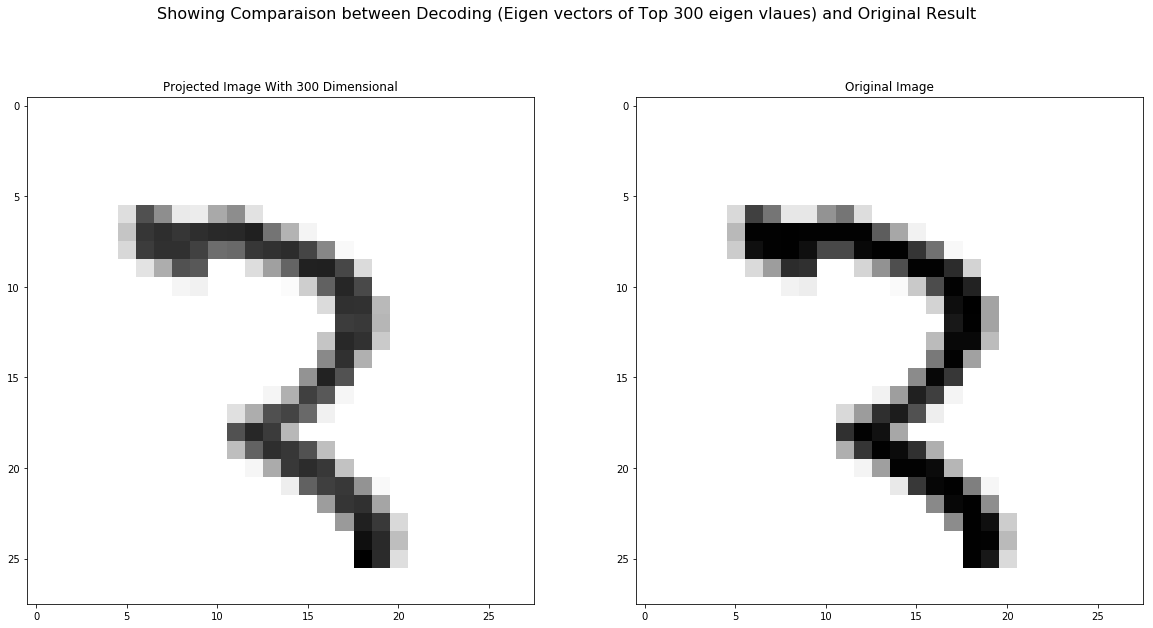

In [18]:
# plot 前 300 大的 eigen vectors 所畫出來的圖
# first we random choice the digit
# then radom choice image
random_digit = random.choice(train_sample)
random_image = random.choice(random_digit)
vectors = np.zeros((300,784))

projected_result = np.zeros((784))

count = 0
for each_value, each_vector in eig_pairs_300 :
    tmp = np.abs(random_image.reshape(-1).T * each_vector)
    projected_result += (tmp - np.mean(tmp))/ np.std(tmp)
    vectors[count] = each_vector
    count += 0

print("The New Data is : \n{}".format(np.matmul(vectors , train_sample.reshape(1000,784).T)))

fig = plt.figure(figsize=(20,10))
fig.suptitle('Showing Comparaison between Decoding (Eigen vectors of Top 300 eigen vlaues) and Original Result', fontsize=16)

ax = fig.add_subplot(1, 2, 1)
ax.set_title("Projected Image With 300 Dimensional")
ax.imshow(projected_result.reshape(28,28), cmap='binary')
ax1 = fig.add_subplot(1, 2, 2)
ax1.set_title("Original Image")
ax1.imshow(random_image.reshape(28,28), cmap='binary')

The New Data is : 
[[-0.08048171 -0.5481282  -0.31608903 ... -0.67696241 -0.60345038
   0.        ]
 [ 0.          0.          0.         ...  0.          0.
   0.        ]
 [ 0.          0.          0.         ...  0.          0.
   0.        ]
 ...
 [ 0.          0.          0.         ...  0.          0.
   0.        ]
 [ 0.          0.          0.         ...  0.          0.
   0.        ]
 [ 0.          0.          0.         ...  0.          0.
   0.        ]]


/Users/wangboren/.pyenv/versions/3.6.4/lib/python3.6/site-packages/ipykernel_launcher.py:14: ComplexWarning: Casting complex values to real discards the imaginary part
  


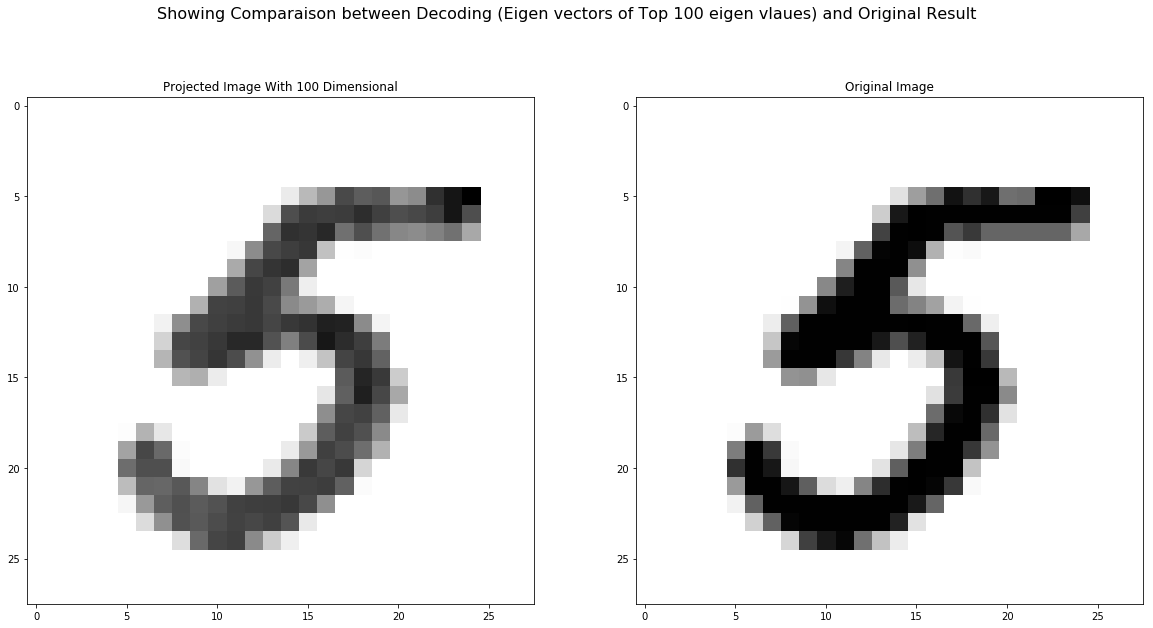

In [19]:
# plot 前 100 大的 eigen vectors 所畫出來的圖
# first we random choice the digit
# then radom choice image
random_digit = random.choice(train_sample)
random_image = random.choice(random_digit)
vectors = np.zeros((100,784))

projected_result = np.zeros((784))

count = 0
for each_value, each_vector in eig_pairs_100 :
    tmp = np.abs(random_image.reshape(-1).T * each_vector)
    projected_result += (tmp - np.mean(tmp))/ np.std(tmp)
    vectors[count] = each_vector
    count += 0

print("The New Data is : \n{}".format(np.matmul(vectors , train_sample.reshape(1000,784).T)))

fig = plt.figure(figsize=(20,10))
fig.suptitle('Showing Comparaison between Decoding (Eigen vectors of Top 100 eigen vlaues) and Original Result', fontsize=16)

ax = fig.add_subplot(1, 2, 1)
ax.set_title("Projected Image With 100 Dimensional")
ax.imshow(projected_result.reshape(28,28), cmap='binary')
ax1 = fig.add_subplot(1, 2, 2)
ax1.set_title("Original Image")
ax1.imshow(random_image.reshape(28,28), cmap='binary')

The New Data is : 
[[0.52669256 0.58678696 0.71077567 ... 0.77692768 0.26963672 0.        ]
 [0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.         0.         0.        ]
 ...
 [0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.         0.         0.        ]]


/Users/wangboren/.pyenv/versions/3.6.4/lib/python3.6/site-packages/ipykernel_launcher.py:14: ComplexWarning: Casting complex values to real discards the imaginary part
  


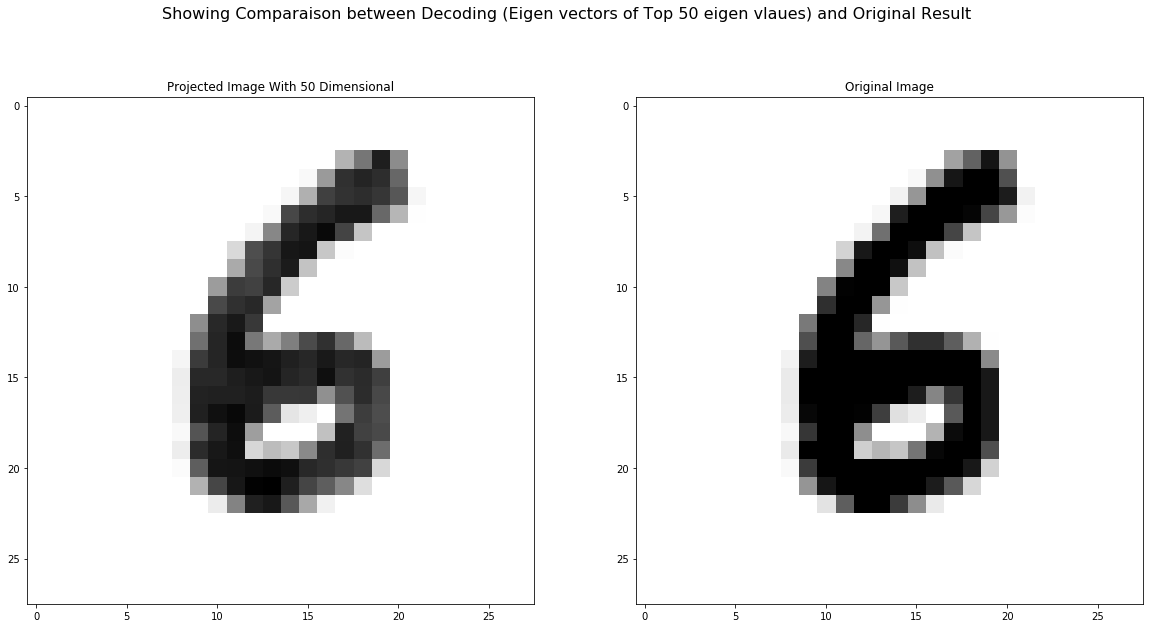

In [20]:
# plot 前 50 大的 eigen vectors 所畫出來的圖
# first we random choice the digit
# then radom choice image
random_digit = random.choice(train_sample)
random_image = random.choice(random_digit)
vectors = np.zeros((50,784))

projected_result = np.zeros((784))

count = 0
for each_value, each_vector in eig_pairs_50 :
    tmp = np.abs(random_image.reshape(-1).T * each_vector)
    projected_result += (tmp - np.mean(tmp))/ np.std(tmp)
    vectors[count] = each_vector
    count += 0

print("The New Data is : \n{}".format(np.matmul(vectors , train_sample.reshape(1000,784).T)))

fig = plt.figure(figsize=(20,10))
fig.suptitle('Showing Comparaison between Decoding (Eigen vectors of Top 50 eigen vlaues) and Original Result', fontsize=16)

ax = fig.add_subplot(1, 2, 1)
ax.set_title("Projected Image With 50 Dimensional")
ax.imshow(projected_result.reshape(28,28), cmap='binary')
ax1 = fig.add_subplot(1, 2, 2)
ax1.set_title("Original Image")
ax1.imshow(random_image.reshape(28,28), cmap='binary')

The New Data is : 
[[ 1.5865072   0.6157811   0.37166823 ... -0.11523196 -0.73602805
   0.        ]
 [ 0.          0.          0.         ...  0.          0.
   0.        ]
 [ 0.          0.          0.         ...  0.          0.
   0.        ]
 ...
 [ 0.          0.          0.         ...  0.          0.
   0.        ]
 [ 0.          0.          0.         ...  0.          0.
   0.        ]
 [ 0.          0.          0.         ...  0.          0.
   0.        ]]


/Users/wangboren/.pyenv/versions/3.6.4/lib/python3.6/site-packages/ipykernel_launcher.py:14: ComplexWarning: Casting complex values to real discards the imaginary part
  


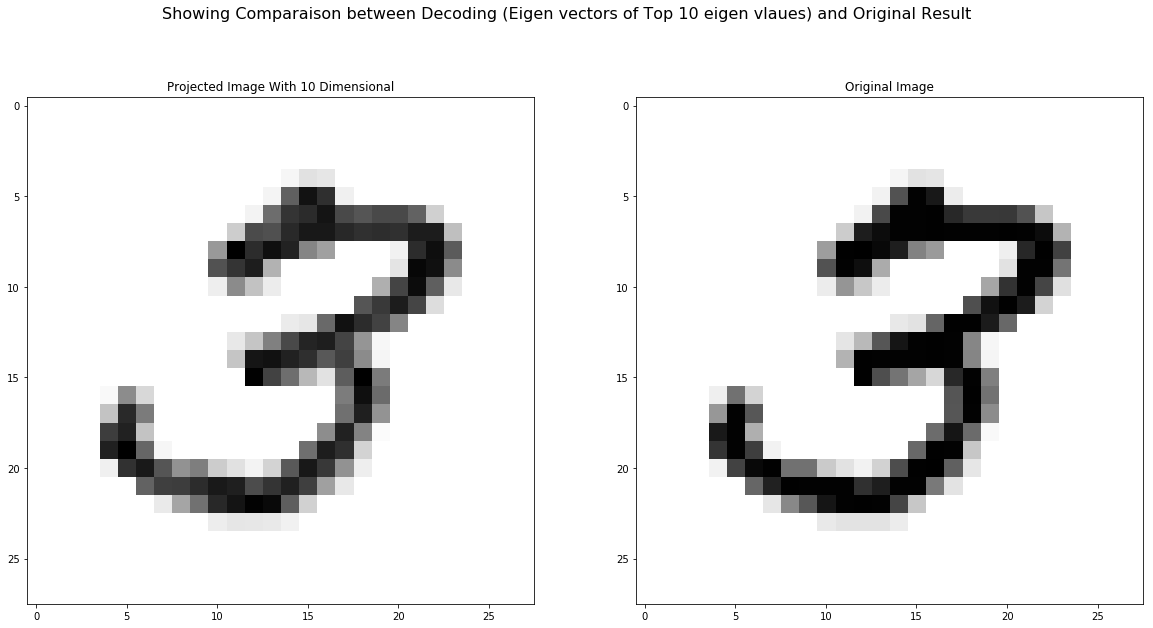

In [21]:
# plot 前 10 大的 eigen vectors 所畫出來的圖
# first we random choice the digit
# then radom choice image
random_digit = random.choice(train_sample)
random_image = random.choice(random_digit)
vectors = np.zeros((10,784))

projected_result = np.zeros((784))

count = 0
for each_value, each_vector in eig_pairs_10 :
    tmp = np.abs(random_image.reshape(-1).T * each_vector)
    projected_result += (tmp - np.mean(tmp))/ np.std(tmp)
    vectors[count] = each_vector
    count += 0

print("The New Data is : \n{}".format(np.matmul(vectors , train_sample.reshape(1000,784).T)))
fig = plt.figure(figsize=(20,10))
fig.suptitle('Showing Comparaison between Decoding (Eigen vectors of Top 10 eigen vlaues) and Original Result', fontsize=16)

ax = fig.add_subplot(1, 2, 1)
ax.set_title("Projected Image With 10 Dimensional")
ax.imshow(projected_result.reshape(28,28), cmap='binary')
ax1 = fig.add_subplot(1, 2, 2)
ax1.set_title("Original Image")
ax1.imshow(random_image.reshape(28,28), cmap='binary')

The New Data is : 
[[-1.52921289 -0.31946832 -0.36104658 ... -2.19082761 -4.23549517
   0.        ]
 [ 0.          0.          0.         ...  0.          0.
   0.        ]]


/Users/wangboren/.pyenv/versions/3.6.4/lib/python3.6/site-packages/ipykernel_launcher.py:14: ComplexWarning: Casting complex values to real discards the imaginary part
  


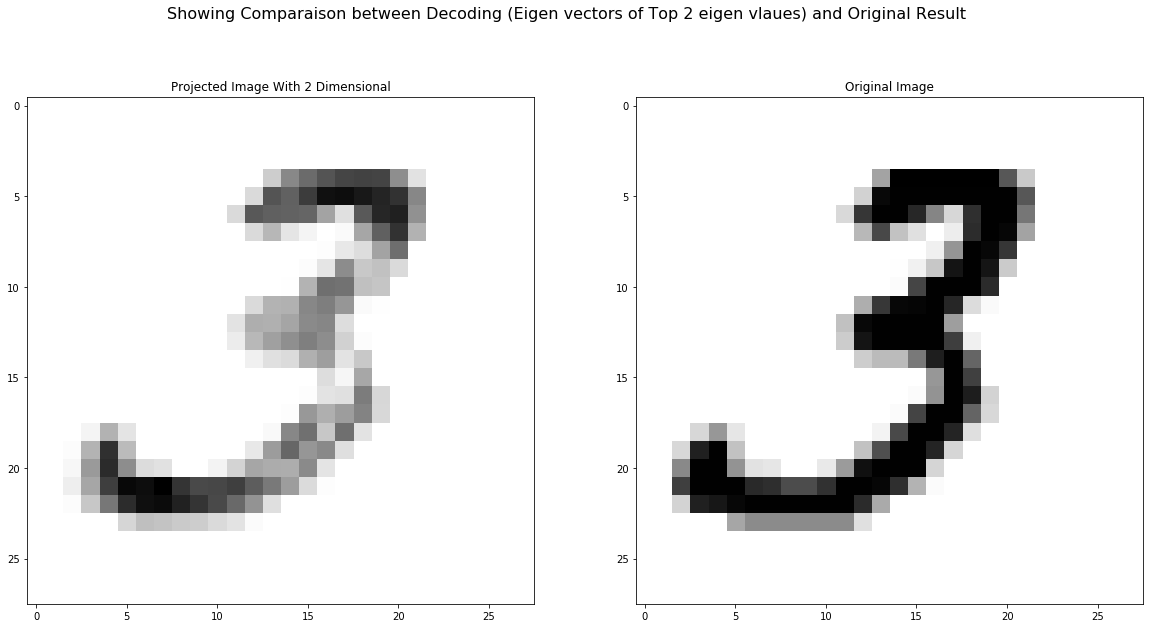

In [22]:
# plot 前 2 大的 eigen vectors 所畫出來的圖
# first we random choice the digit
# then radom choice image
random_digit = random.choice(train_sample)
random_image = random.choice(random_digit)
vectors = np.zeros((2,784))

projected_result = np.zeros((784))

count = 0
for each_value, each_vector in eig_pairs_2 :
    tmp = np.abs(random_image.reshape(-1).T * each_vector)
    projected_result += (tmp - np.mean(tmp))/ np.std(tmp)
    vectors[count] = each_vector
    count += 0

print("The New Data is : \n{}".format(np.matmul(vectors , train_sample.reshape(1000,784).T)))

fig = plt.figure(figsize=(20,10))
fig.suptitle('Showing Comparaison between Decoding (Eigen vectors of Top 2 eigen vlaues) and Original Result', fontsize=16)

ax = fig.add_subplot(1, 2, 1)
ax.set_title("Projected Image With 2 Dimensional")
ax.imshow(projected_result.reshape(28,28), cmap='binary')
ax1 = fig.add_subplot(1, 2, 2)
ax1.set_title("Original Image")
ax1.imshow(random_image.reshape(28,28), cmap='binary')

The New Data is : 
[[-5.87548696e-01  1.13263370e-01 -3.85826422e-01 -3.22809676e-01
  -6.28629174e-01  1.21978670e+00 -6.65365684e-01 -3.66026543e-01
  -6.58843700e-01  1.67620625e+00 -4.23648026e-01 -6.34063253e-01
  -8.03149267e-01 -7.27381229e-01 -2.94386744e-01  3.36819963e-02
  -5.23457486e-01 -6.65036872e-01 -3.75742670e-01 -4.72484763e-01
  -5.40990284e-01  2.09294074e+00 -2.56917593e-01 -5.71421712e-01
  -8.89599875e-01 -1.14693967e-01  3.25907651e-02 -5.10005866e-01
  -3.61754801e-01 -7.34991710e-01 -6.38190062e-01  1.61052352e+00
  -5.50602591e-01  5.65570483e-01 -8.48859944e-01 -4.60520955e-01
  -2.74417988e-01 -5.86320562e-01 -6.20731318e-01 -3.86553230e-01
  -4.93972094e-01 -7.00285833e-01 -6.73338583e-01 -6.19184123e-01
  -5.20725695e-01 -8.64561754e-01 -7.72120478e-02 -4.06630572e-01
  -2.41561707e-01  4.40311281e-01 -4.85687841e-01 -1.43954658e-01
   2.68236449e-01 -5.69491255e-01 -1.09816166e+00 -4.39247664e-01
  -3.86769439e-01 -2.73088603e-01 -5.73726649e-01 -7.9617

/Users/wangboren/.pyenv/versions/3.6.4/lib/python3.6/site-packages/ipykernel_launcher.py:14: ComplexWarning: Casting complex values to real discards the imaginary part
  


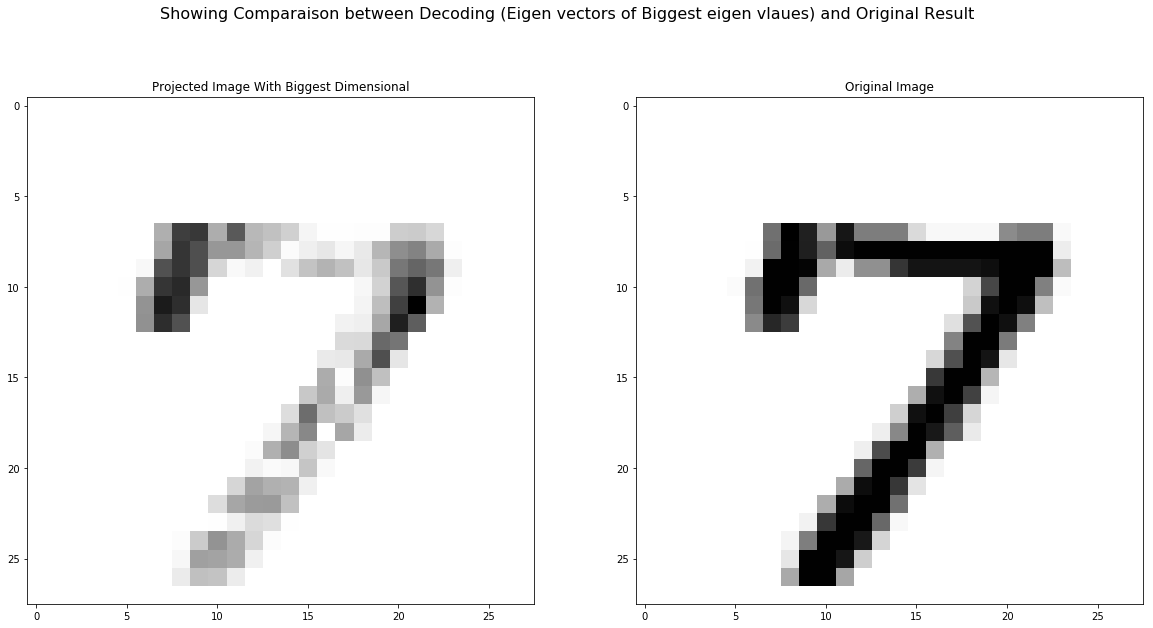

In [23]:
# plot 前 1 大的 eigen vectors 所畫出來的圖
# first we random choice the digit
# then radom choice image
random_digit = random.choice(train_sample)
random_image = random.choice(random_digit)
vectors = np.zeros((1,784))

projected_result = np.zeros((784))

count = 0
for each_value, each_vector in eig_pairs_biggest :
    tmp = np.abs(random_image.reshape(-1).T * each_vector)
    projected_result += (tmp - np.mean(tmp))/ np.std(tmp)
    vectors[count] = each_vector
    count += 0

print("The New Data is : \n{}".format(np.matmul(vectors , train_sample.reshape(1000,784).T)))
    
fig = plt.figure(figsize=(20,10))
fig.suptitle('Showing Comparaison between Decoding (Eigen vectors of Biggest eigen vlaues) and Original Result', fontsize=16)

ax = fig.add_subplot(1, 2, 1)
ax.set_title("Projected Image With Biggest Dimensional")
ax.imshow(projected_result.reshape(28,28), cmap='binary')
ax1 = fig.add_subplot(1, 2, 2)
ax1.set_title("Original Image")
ax1.imshow(random_image.reshape(28,28), cmap='binary')

The New Data with 500 dimensional is : 
[[ 0.02086029  0.0060809   0.01243795 ...  0.0584147  -0.04757836
   0.        ]
 [ 0.          0.          0.         ...  0.          0.
   0.        ]
 [ 0.          0.          0.         ...  0.          0.
   0.        ]
 ...
 [ 0.          0.          0.         ...  0.          0.
   0.        ]
 [ 0.          0.          0.         ...  0.          0.
   0.        ]
 [ 0.          0.          0.         ...  0.          0.
   0.        ]]
The New Data with 300 dimensional is : 
[[-0.048741   -0.08137146  0.05134475 ... -0.12016946 -0.03222935
   0.        ]
 [ 0.          0.          0.         ...  0.          0.
   0.        ]
 [ 0.          0.          0.         ...  0.          0.
   0.        ]
 ...
 [ 0.          0.          0.         ...  0.          0.
   0.        ]
 [ 0.          0.          0.         ...  0.          0.
   0.        ]
 [ 0.          0.          0.         ...  0.          0.
   0.        ]]
The New Data wit

/Users/wangboren/.pyenv/versions/3.6.4/lib/python3.6/site-packages/ipykernel_launcher.py:32: ComplexWarning: Casting complex values to real discards the imaginary part
/Users/wangboren/.pyenv/versions/3.6.4/lib/python3.6/site-packages/ipykernel_launcher.py:38: ComplexWarning: Casting complex values to real discards the imaginary part
/Users/wangboren/.pyenv/versions/3.6.4/lib/python3.6/site-packages/ipykernel_launcher.py:44: ComplexWarning: Casting complex values to real discards the imaginary part
/Users/wangboren/.pyenv/versions/3.6.4/lib/python3.6/site-packages/ipykernel_launcher.py:50: ComplexWarning: Casting complex values to real discards the imaginary part
/Users/wangboren/.pyenv/versions/3.6.4/lib/python3.6/site-packages/ipykernel_launcher.py:56: ComplexWarning: Casting complex values to real discards the imaginary part
/Users/wangboren/.pyenv/versions/3.6.4/lib/python3.6/site-packages/ipykernel_launcher.py:62: ComplexWarning: Casting complex values to real discards the imagina

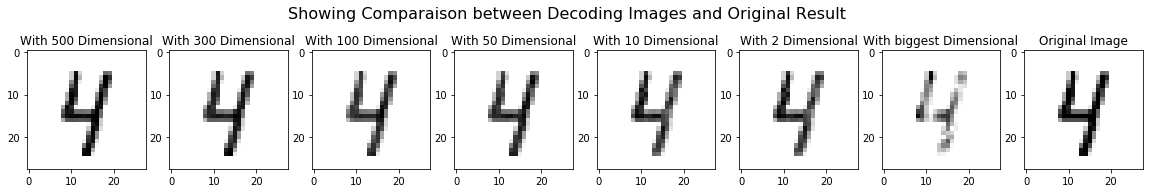

In [24]:
# combine all result for all decoded images
random_digit = random.choice(train_sample)
random_image = random.choice(random_digit)

projected_result_500 = np.zeros((784))
projected_result_300 = np.zeros((784))
projected_result_100 = np.zeros((784))
projected_result_50 = np.zeros((784))
projected_result_10 = np.zeros((784))
projected_result_2 = np.zeros((784))
projected_result_biggest = np.zeros((784))

vectors_500 = np.zeros((500,784))
vectors_300 = np.zeros((300,784))
vectors_100 = np.zeros((100,784))
vectors_50 = np.zeros((50,784))
vectors_10 = np.zeros((10,784))
vectors_2 = np.zeros((2,784))
vectors_biggest = np.zeros((1,784))

count_500 = 0
count_300 = 0
count_100 = 0
count_50 = 0
count_10 = 0
count_2 = 0
count_biggest = 0

for each_value, each_vector in eig_pairs_500 :
    tmp_500 = np.abs(random_image.reshape(-1).T * each_vector)
    projected_result_500 += (tmp_500 - np.mean(tmp_500))/ np.std(tmp_500)
    vectors_500[count_500] = each_vector
    count_500 += 0
    
for each_value, each_vector in eig_pairs_300 :
    tmp_300 = np.abs(random_image.reshape(-1).T * each_vector)
    projected_result_300 += (tmp_300 - np.mean(tmp_300))/ np.std(tmp_300)
    vectors_300[count_300] = each_vector
    count_300 += 0
    
for each_value, each_vector in eig_pairs_100 :
    tmp_100 = np.abs(random_image.reshape(-1).T * each_vector)
    projected_result_100 += (tmp_100 - np.mean(tmp_100))/ np.std(tmp_100)
    vectors_100[count_100] = each_vector
    count_100 += 0
    
for each_value, each_vector in eig_pairs_50 :
    tmp_50 = np.abs(random_image.reshape(-1).T * each_vector)
    projected_result_50 += (tmp_50 - np.mean(tmp_50))/ np.std(tmp_50)
    vectors_50[count_50] = each_vector
    count_50 += 0

for each_value, each_vector in eig_pairs_10 :
    tmp_10 = np.abs(random_image.reshape(-1).T * each_vector)
    projected_result_10 += (tmp_10 - np.mean(tmp_10))/ np.std(tmp_10)
    vectors_10[count_10] = each_vector
    count_10 += 0
    
for each_value, each_vector in eig_pairs_10 :
    tmp_2 = np.abs(random_image.reshape(-1).T * each_vector)
    projected_result_2 += (tmp_2 - np.mean(tmp_2))/ np.std(tmp_2)
    vectors_2[count_2] = each_vector
    count_2 += 0
    
for each_value, each_vector in eig_pairs_biggest :
    tmp_biggest = np.abs(random_image.reshape(-1).T * each_vector)
    projected_result_biggest += (tmp_biggest - np.mean(tmp_biggest))/ np.std(tmp_biggest)
    vectors_biggest[count_biggest] = each_vector
    count_biggest += 0
              
              
print("The New Data with 500 dimensional is : \n{}".format(np.matmul(vectors_500 , train_sample.reshape(1000,784).T)))
print("The New Data with 300 dimensional is : \n{}".format(np.matmul(vectors_300 , train_sample.reshape(1000,784).T)))
print("The New Data with 100 dimensional is : \n{}".format(np.matmul(vectors_100 , train_sample.reshape(1000,784).T)))
print("The New Data with 50 dimensional is : \n{}".format(np.matmul(vectors_50 , train_sample.reshape(1000,784).T)))
print("The New Data with 10 dimensional is : \n{}".format(np.matmul(vectors_10 , train_sample.reshape(1000,784).T)))
print("The New Data with 2 dimensional is : \n{}".format(np.matmul(vectors_2 , train_sample.reshape(1000,784).T)))
print("The New Data with biggest dimensional is : \n{}".format(np.matmul(vectors_biggest , train_sample.reshape(1000,784).T)))

fig = plt.figure(figsize=(20,3))
fig.suptitle('Showing Comparaison between Decoding Images and Original Result', fontsize=16)

ax = fig.add_subplot(1, 8, 1)
ax.set_title("With 500 Dimensional")
ax.imshow(projected_result_500.reshape(28,28), cmap='binary')
ax = fig.add_subplot(1, 8, 2)
ax.set_title("With 300 Dimensional")
ax.imshow(projected_result_300.reshape(28,28), cmap='binary')
ax = fig.add_subplot(1, 8, 3)
ax.set_title("With 100 Dimensional")
ax.imshow(projected_result_100.reshape(28,28), cmap='binary')
ax = fig.add_subplot(1, 8, 4)
ax.set_title("With 50 Dimensional")
ax.imshow(projected_result_50.reshape(28,28), cmap='binary')
ax = fig.add_subplot(1, 8, 5)
ax.set_title("With 10 Dimensional")
ax.imshow(projected_result_10.reshape(28,28), cmap='binary')
ax = fig.add_subplot(1, 8, 6)
ax.set_title("With 2 Dimensional")
ax.imshow(projected_result_2.reshape(28,28), cmap='binary')
ax = fig.add_subplot(1, 8, 7)
ax.set_title("With biggest Dimensional")
ax.imshow(projected_result_biggest.reshape(28,28), cmap='binary')
ax = fig.add_subplot(1, 8, 8)
ax.set_title("Original Image")
ax.imshow(random_image.reshape(28,28), cmap='binary')

## 接著介紹第四題解法及過程，和相關概念：

### 首先第一題：

    - 我們分別對 train / test 兩類資料依序走訪
    - 每次走訪都會檢查這筆圖案是哪類(0~9)，接著放入該類別所建立的 numpy 之中，並且存在 /data/train 與 /data/test 中
    - 此外，我也限制每個數字(Label)的資料不會超過 100 筆資料！

### 接著第二題：

    - 我用老師的 Sample 將上述所儲存的資料，用 for-loop 將每張圖片畫出來，分別畫出 train 與 test
    
### 接著第三題：

    - 接著我們為了讓數據以統一座標點為出法，利用全數據的平均值以及標準差，以零為基礎，正規化數據！
    
### 最後第四題：
    
    - 我先用 'np.matmul(train_sample_normalize.T, train_sample_normalize)' 算出 covariance，也就是
        
        cov = Xᵀ·X
        
    - 接著再用 numpy linear algebra 的 eig function 找出 eigen vectors / eigen values
    - 接著依照其 eigen value 的大小，將前 500,300,100,50,10,2,1 大的 eigen vector 找出來
    - 接著再依序用這些 vector ，利用 Xᵀ·vector ，算出距離後正規化，並相互疊加，重建圖形，並且與原圖比較
    
    > 這題我們發現，利用前 N 大 eigen value 的 eigen vector 所重新建立的圖形，當 N 越多的時候，越能接近原圖。
    > 但以最大的 eigen vector 重建時，也發現因為其影響力較大，所以重建時就已經很貼近原圖了
    > 這也意味著，只需要前 N 大的 eigen vector，就能保留圖形的資訊了，達到降維效果！如上面所 print 出的 New Data